In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib inline

In [2]:
from src.lights import change_lights
from src.main import generate_scenario, run_scenario
from src.logger import ExperimentLogger

from utils.common import do_test_steps, create_simulator, get_camera_matrix, place_agent

pybullet build time: Feb 12 2024 18:02:59


In [3]:
def create_experiment(sim_settings_filename, display=False):
    logger = ExperimentLogger(sim_settings_filename)
    sim_settings, _ = logger.get_settings()

    sim = create_simulator(sim_settings)

    start_point, navigatable_points = generate_scenario(sim, sim_settings, display=display)

    return {'logger': logger, 'sim': sim, 'start_point': start_point, 'nav_points': navigatable_points}

In [4]:
def full_generation(experiment, bar_inds=[0, 1], display=False):
    logger = experiment['logger']
    sim = experiment['sim']
    start_point = experiment['start_point']
    navigatable_points = experiment['nav_points']

    sim_settings, light_settings = logger.get_settings()

    sim = place_agent(sim, sim_settings['default_agent'], start_point)

    run_scenario(sim, sim_settings, light_settings, navigatable_points, logger, display=display, bar_inds=bar_inds)

In [5]:
def full_generation_(sim_settings_filename, bar_inds=[0, 1], display=False):
    logger = ExperimentLogger(sim_settings_filename)
    sim_settings, _ = logger.get_settings()

    sim = create_simulator(sim_settings)

    start_point, navigatable_points = generate_scenario(sim, sim_settings, display=display)

    sim_settings, light_settings = logger.get_settings()

    sim = place_agent(sim, sim_settings['default_agent'], start_point)

    run_scenario(sim, sim_settings, light_settings, navigatable_points, logger, display=display, bar_inds=bar_inds)

In [6]:
from concurrent.futures import ThreadPoolExecutor

config_count = 5
num_workers = min(config_count, 12)

# experiments = [create_experiment(f'sim_settings_{i}.json') for i in range(config_count)]

In [9]:
with ThreadPoolExecutor(max_workers=num_workers) as executor:
    for i in range(config_count):
        # full_generation(exp, [i*2, i*2 + 1])
        executor.submit(full_generation_, f'sim_settings_{i}.json', [i*2, i*2 + 1])

Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 545.23.08
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


[01:36:54:407406]:[Error]:[Metadata] ObjectAttributesManager.cpp(219)::registerObjectFinalize : Attributes template named `./../data/ReplicaCAD_dataset/configs/objects/frl_apartment_door_01.object_config.json` does not have a valid render asset handle specified, so registration is aborted.
[01:36:54:409715]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Articulated Object> : No Glob path result found for `./../data/hab_fetch_1.0/robots/fetch_no_base.urdf` so unable to load templates from that path.
[01:36:54:440912]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_00.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[01:36:54:440941]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_01.navmesh` not found on disk as absolute path or relat

Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 545.23.08
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits
Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by

ive to `./../data/ReplicaCAD_dataset`
[01:36:58:697968]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_02.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[01:36:58:697986]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_03.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[01:36:58:698003]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_04.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[01:36:58:698021]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_05.navmesh` not found on disk as absolute path or relative to `./..

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

sim_settings_1.json proccessing:   0%|          | 0/10 [00:00<?, ?it/s]

sim_settings_3.json proccessing:   0%|          | 0/10 [00:00<?, ?it/s]

sim_settings_2.json proccessing:   0%|          | 0/10 [00:00<?, ?it/s]

sim_settings_4.json proccessing:   0%|          | 0/10 [00:00<?, ?it/s]

[01:37:11:400554]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
[01:37:13:377953]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
[01:37:15:367196]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
[01:37:17:340086]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
[01:37:24:782276]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 2
[01:37:26:977396]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotatio

Navigation #3:   0%|          | 0/281 [00:00<?, ?it/s]

Navigation #0:   0%|          | 0/604 [00:00<?, ?it/s]

Navigation #0:   0%|          | 0/657 [00:00<?, ?it/s]

Navigation #0:   0%|          | 0/697 [00:00<?, ?it/s]

Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 545.23.08
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


[01:37:47:240858]:[Error]:[Metadata] ObjectAttributesManager.cpp(219)::registerObjectFinalize : Attributes template named `./../data/ReplicaCAD_dataset/configs/objects/frl_apartment_door_01.object_config.json` does not have a valid render asset handle specified, so registration is aborted.
[01:37:47:244521]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Articulated Object> : No Glob path result found for `./../data/hab_fetch_1.0/robots/fetch_no_base.urdf` so unable to load templates from that path.
[01:37:47:280698]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_00.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[01:37:47:280726]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_01.navmesh` not found on disk as absolute path or relat

  0%|          | 0/10 [00:00<?, ?it/s]

sim_settings_0.json proccessing:   0%|          | 0/10 [00:00<?, ?it/s]

[01:37:51:562077]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 1
[01:37:55:261633]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 2
[01:37:57:293883]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 3
[01:37:59:335005]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 4


Navigation #3:   0%|          | 0/281 [00:00<?, ?it/s]

[01:38:48:126490]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 5


Navigation #4:   0%|          | 0/788 [00:00<?, ?it/s]

[01:39:00:533851]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 5


Navigation #4:   0%|          | 0/788 [00:00<?, ?it/s]

[01:40:02:992917]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 2


Navigation #1:   0%|          | 0/557 [00:00<?, ?it/s]

[01:40:18:853164]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 2
[01:40:29:000668]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 2


Navigation #1:   0%|          | 0/855 [00:00<?, ?it/s]

Navigation #1:   0%|          | 0/703 [00:00<?, ?it/s]

[01:42:08:022934]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 6
[01:42:10:028453]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 7


Navigation #6:   0%|          | 0/458 [00:00<?, ?it/s]

[01:42:15:714325]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 6
[01:42:17:707046]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 7


Navigation #6:   0%|          | 0/458 [00:00<?, ?it/s]

[01:42:23:998769]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 3
[01:42:36:315010]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 4


Navigation #3:   0%|          | 0/918 [00:00<?, ?it/s]

[01:43:13:110233]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 3
[01:43:15:109055]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 4


Navigation #3:   0%|          | 0/1010 [00:00<?, ?it/s]

[01:43:53:557102]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 3


Navigation #2:   0%|          | 0/1292 [00:00<?, ?it/s]

[01:44:19:995243]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 8


Navigation #7:   0%|          | 0/993 [00:00<?, ?it/s]

[01:44:34:909897]:[Warning]:[Sim] Simulator.cpp(533)::instanceStageForSceneAttributes : The active scene does not contain semantic annotations : activeSemanticSceneID_ = 8


Navigation #7:   0%|          | 0/993 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# with ThreadPoolExecutor(max_workers=1) as executor:
#     for i, exp in enumerate(experiments):
#         # full_generation(exp, [i*2, i*2 + 1])
#         executor.submit(full_generation, experiment=exp, bar_inds=[i*2, i*2 + 1])

In [ ]:
assert False

AssertionError: 

In [ ]:
DEBUG = True

In [ ]:
sim_settings_filename = 'sim_settings_replica_cad.json'

In [ ]:
logger = ExperimentLogger(sim_settings_filename)

sim_settings, light_settings = logger.get_settings()

In [ ]:
try:
    sim.close()
except NameError:
    pass

sim = create_simulator(sim_settings)

Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 545.23.08
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness

[22:04:29:439494]:[Error]:[Metadata] ObjectAttributesManager.cpp(219)::registerObjectFinalize : Attributes template named `./../data/ReplicaCAD_dataset/configs/objects/frl_apartment_door_01.object_config.json` does not have a valid render asset handle specified, so registration is aborted.
[22:04:29:441775]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Articulated Object> : No Glob path result found for `./../data/hab_fetch_1.0/robots/fetch_no_base.urdf` so unable to load templates from that path.
[22:04:29:470679]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_00.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[22:04:29:470745]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_01.navmesh` not found on disk as absolute path or relat


    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


eneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_15.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[22:04:29:471028]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_16.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[22:04:29:471046]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_17.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[22:04:29:471064]:[Warning]:[Metadata] SceneDatasetAttributesManager.cpp(124)::loadAndValidateMap : `navmesh_instances` Value : `navmeshes/v3_sc4_staging_18.navmesh` not found on disk as absolute path or relative to `./../data/ReplicaCAD_dataset`
[22:04:29:471082]:[Warning]:[Metadata] SceneDatasetAt

NavMesh area = 58.55546188354492
Bounds =  [-2.6617632  -0.04774481 -4.759779  ] [4.5961666 3.059499  8.168275 ]
Start point : [-0.5303759   0.15225519  3.323641  ]


100%|██████████| 10/10 [00:00<00:00, 13127.71it/s]

Random navigable points :  [2.5052977  0.15225519 4.691701  ] [2.7898188  0.15225519 6.4780993 ] [1.0005856  0.15225519 6.3899593 ] [-0.45410433  0.15225519  1.8319572 ] [2.8060017  0.15225519 1.6544211 ] [2.1478941  0.15225519 0.07292235] [4.0531387  0.15225519 4.6927094 ] [0.7743747  0.15225519 2.1651883 ] [1.6703315  0.15225519 3.0904844 ] [ 0.16050607  0.15225519 -2.0197258 ]
Are points navigable? True


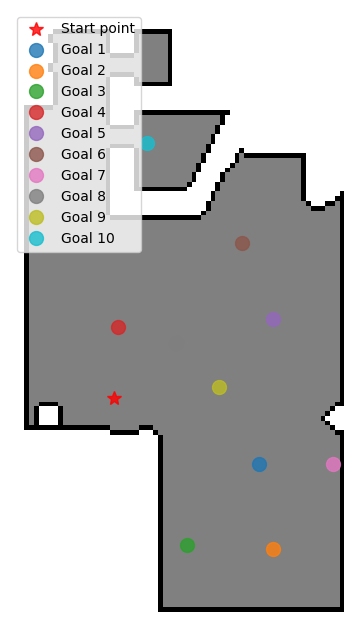

In [ ]:
start_point, navigatable_points = generate_scenario(sim, sim_settings)

In [ ]:
import numpy as np
import quaternion

In [ ]:
sim = place_agent(sim, sim_settings['default_agent'], start_point)

In [ ]:
sim.agents[0].get_state()

AgentState(position=array([-0.5303759 ,  0.15225519,  3.323641  ], dtype=float32), rotation=quaternion(0.477158963680267, 0, 0.878817021846771, 0), sensor_states={'color_sensor': SixDOFPose(position=array([-0.5303759,  1.6522552,  3.323641 ], dtype=float32), rotation=quaternion(0.477158963680267, 0, 0.878817021846771, 0)), 'depth_sensor': SixDOFPose(position=array([-0.5303759,  1.6522552,  3.323641 ], dtype=float32), rotation=quaternion(0.477158963680267, 0, 0.878817021846771, 0)), 'semantic_sensor': SixDOFPose(position=array([-0.5303759,  1.6522552,  3.323641 ], dtype=float32), rotation=quaternion(0.477158963680267, 0, 0.878817021846771, 0))})

In [ ]:
assert all(sim.agents[sim_settings['default_agent']].get_state().position == start_point)

action turn_left


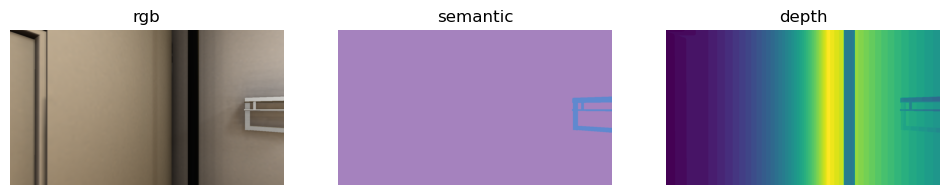

action turn_left


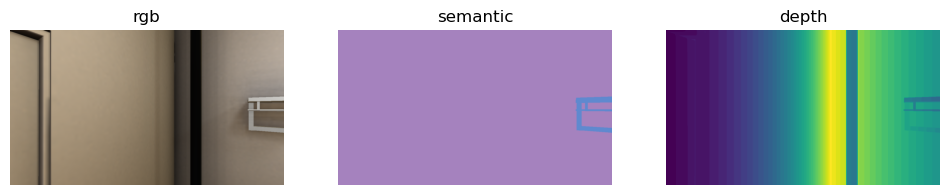

action turn_left


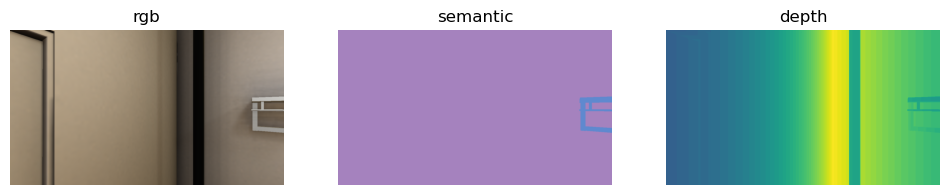

action turn_left


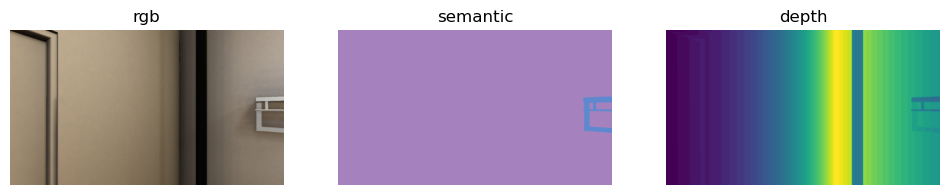

action turn_left


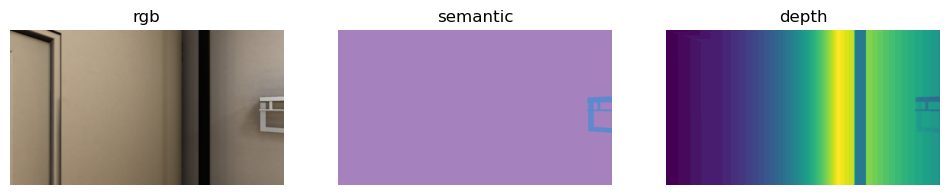

In [ ]:
if DEBUG:
    sim, _ = change_lights(sim, sim_settings, light_settings, life_index=0)
    do_test_steps(sim, sim_settings, max_frames=5)

  0%|          | 0/10 [00:00<?, ?it/s]

Light setup: None


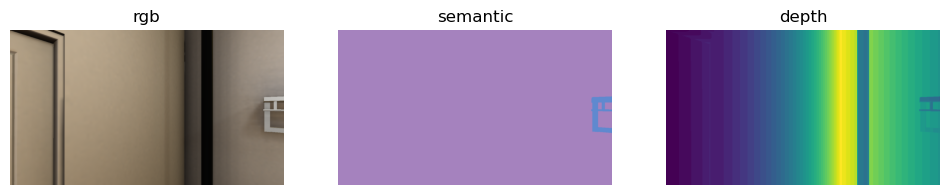

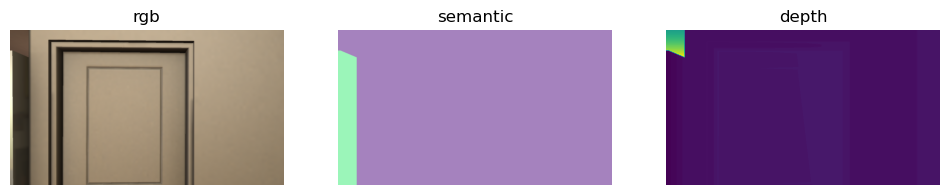

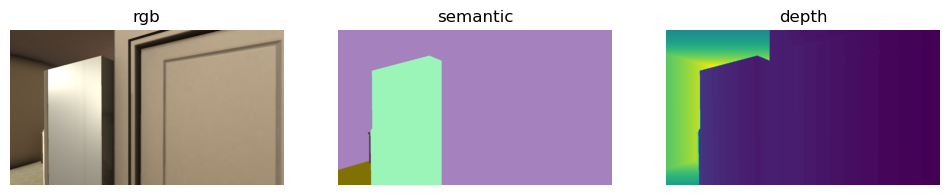

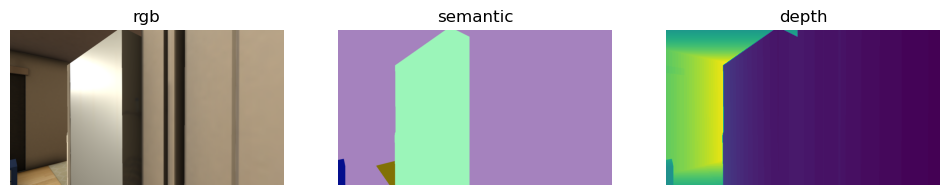

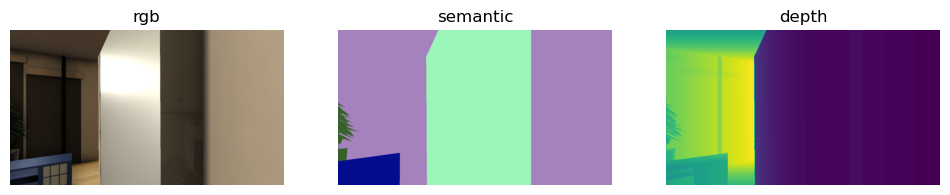

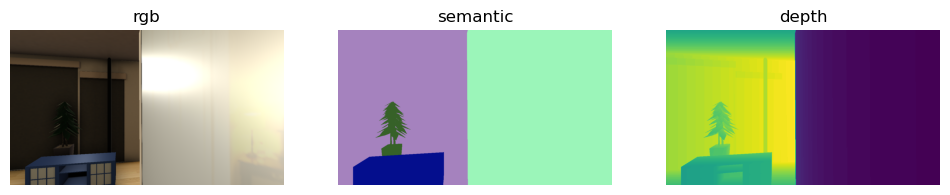

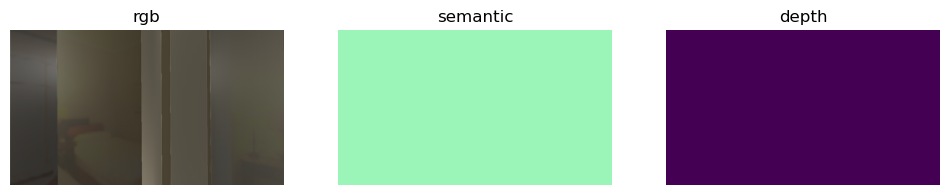

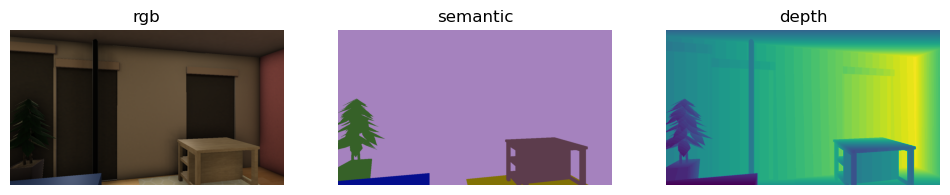

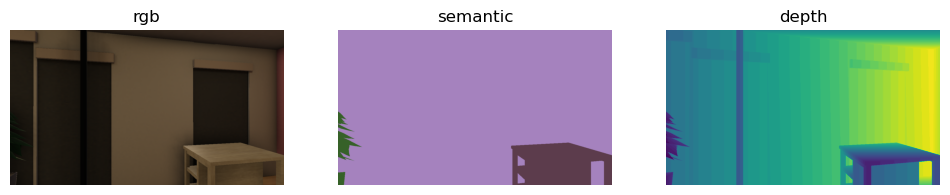

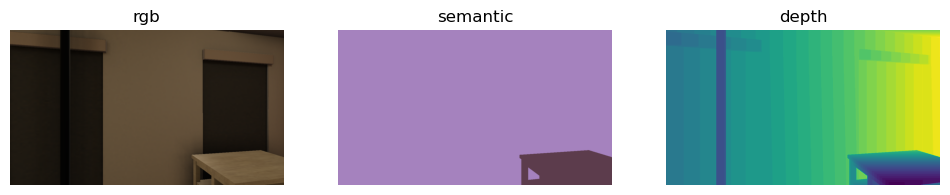

  0%|          | 0/10 [00:48<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
run_scenario(sim, sim_settings, light_settings, navigatable_points, logger)

In [ ]:
K = get_camera_matrix(sim.agents[sim_settings['default_agent']])

In [ ]:
print(f"camera_matrix = \n{K}\n\ndepth_scale = {sim_settings['depth_scale']}")

camera_matrix = 
[[600.    0.  599.5]
 [  0.  600.  339.5]
 [  0.    0.    1. ]]

depth_scale = 6553.5


In [ ]:
!rm generated.zip
!zip -r generated.zip generated/

  adding: generated/ (stored 0%)
  adding: generated/replica_cad/ (stored 0%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/ (stored 0%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/ (stored 0%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/log.txt (deflated 89%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/sim_settings.json (deflated 64%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/results/ (stored 0%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/results/frame000016.jpg (deflated 62%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/results/depth000071.png (deflated 90%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/results/frame000003.jpg (deflated 59%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_lights/results/frame000009.jpg (deflated 60%)
  adding: generated/replica_cad/Stage_v3_sc3_staging/default_light